## Testing effects of soil and fire properties on soil microbial communities

In [1]:
library(phyloseq)
library(vegan)
library(plyr)
library(dplyr)
library(ggplot2)

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-4

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
ps = readRDS("../../../data/Seq_data/16S/CHTC/Dada2_Results/ps.merged")

In [3]:
B1=50
B2=200
B3=400
sample_data(ps)$RBR_Cat = ifelse(sample_data(ps)$RBR<B1,"Unburned",
                                 ifelse(sample_data(ps)$RBR<B2,"Low",
                                       ifelse(sample_data(ps)$RBR<B3,"Moderate","High")))
sample_data(ps)$RBR_Cat

[1] "High"     "Moderate" "Low"      "Low"      "Moderate" "Moderate"
  [7] "Low"      "Low"      "Low"      "Low"      "Unburned" "Low"     
 [13] "Low"      "Low"      "High"     "High"     "Moderate" "High"    
 [19] "High"     "Low"      "Low"      "Low"      "High"     "High"    
 [25] "High"     "High"     "Moderate" "High"     "Moderate" "Moderate"
 [31] "Low"      "Low"      "Low"      "Low"      "Moderate" "Moderate"
 [37] "High"     "High"     "High"     "High"     "High"     "High"    
 [43] "Low"      "High"     "High"     "High"     "High"     "High"    
 [49] "High"     "Low"      "Unburned" "Low"      "Unburned" "Unburned"
 [55] "Unburned" "Unburned" "Unburned" "Unburned" "Unburned" "Unburned"
 [61] "Unburned" "Unburned" "Unburned" "High"     "High"     "Moderate"
 [67] "High"     "High"     "High"     "Moderate" "Moderate" "High"    
 [73] "High"     "Moderate" "Moderate" "Moderate" "Moderate" "Moderate"
 [79] "Moderate" "Moderate" "Moderate" "High"     "High"     "Moderate"
 [85] "High"     "High"     "Low"      "Low"      "High"     "High"    
 [91] "High"     "High"     "High"     "Unburned" "Unburned" "Low"     
 [97] "Unburned" "Unburned" "Unburned" "Unburned" "Unburned" "Unburned"

In [4]:
ps.norm = transform_sample_counts(ps, function(x) (x / sum(x)))
ps.hell = transform_sample_counts(ps, function(x) (x / sum(x))^0.5)
# Hellinger Transformation: "Particularly suited to species abundance data, 
    # this transformation gives low weights to variables with low counts and many zeros. 
    # The transformation itself comprises dividing each value in a data matrix by its row sum, 
    # and taking the square root of the quotient.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Groups,3,0.01371461,0.004571535,0.9280291,0.4445307
Residuals,21,0.10344745,0.004926069,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                         diff         lwr        upr     p adj
Low-Unburned       0.04446052 -0.07127653 0.16019758 0.7105630
Moderate-Unburned  0.06815560 -0.05164364 0.18795483 0.4076821
High-Unburned      0.02261351 -0.12680239 0.17202941 0.9741125
Moderate-Low       0.02369508 -0.06910101 0.11649116 0.8913204
High-Low          -0.02184701 -0.15062732 0.10693330 0.9642284
High-Moderate     -0.04554209 -0.17798512 0.08690095 0.7739653


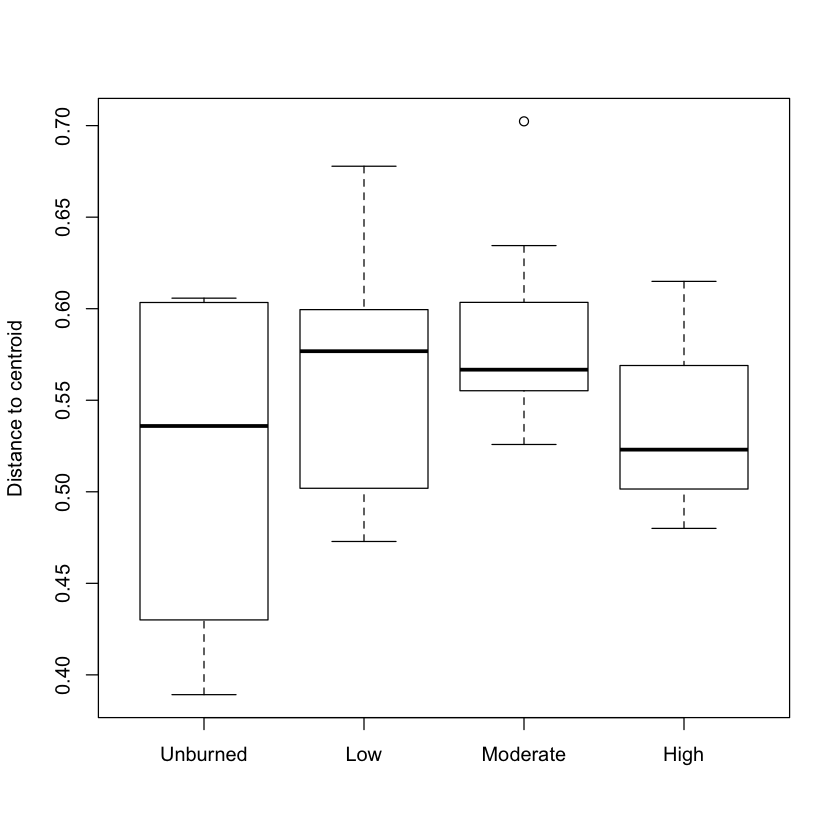

In [5]:
physeq = ps.hell
physeq = subset_samples(physeq,Land_Class=="Wetland")

df = as(sample_data(physeq), "data.frame")

d = distance(physeq, method = "bray", weighted=TRUE)
sampdat = sample_data(physeq)
groups = as.factor(sampdat$Severity_Class)
x = betadisper(d, groups)
boxplot(x, ylab = "Distance to centroid")
anova(x)
TukeyHSD(x, ordered = FALSE, conf.level = 0.95)
# Performing test of beta dispersion - the permanova/adonis test requires that groups have similar dispersion.
# This doesn't look outrageously bad here for the different vegetation communities - no significant differences.
# Looks generally okay for Severity_Class
# Land_Class barely not significant
# Mineral / Organic also have diff betadispersion - but not using as categorical (TC_pct)

In [8]:
sample_data(ps.norm)$RAND_cat = as.factor(sample(1:4, dim(sample_data(ps.norm))[1], replace=T))
sample_data(ps.norm)$RAND_cat = revalue(sample_data(ps.norm)$RAND_cat, c("1"="Unburned", "2"="Low","3"="Mod","4"="High"))
sample_data(ps.norm)$RAND_cat

[1] Unburned Low      Low      Low      High     Mod      High     High    
  [9] High     Mod      Low      High     Low      Low      High     High    
 [17] Low      Unburned High     Low      Unburned Unburned Mod      High    
 [25] Mod      Mod      Mod      Unburned Unburned Mod      Mod      Unburned
 [33] Low      Mod      Unburned High     Low      Unburned Unburned High    
 [41] Unburned High     Mod      Mod      Low      Mod      Mod      High    
 [49] Low      Mod      Low      Low      Mod      Unburned Mod      Unburned
 [57] Low      Mod      Mod      Mod      Mod      Unburned Mod      Mod     
 [65] High     High     Mod      High     Mod      High     High     Low     
 [73] Mod      Low      High     Low      Mod      Low      Low      High    
 [81] High     High     High     High     High     Unburned Mod      Mod     
 [89] High     Low      Mod      Mod      Mod      Mod      Low      Mod     
 [97] Mod      Unburned Unburned Unburned Low      Low     
Levels: Unburned Low Mod High

In [22]:
AdonisFunction = function(physeq=ps.norm, method="bray", Org_or_Min=c("O","M"), Land_Class=c("Upland","Wetland")){
    #physeq = prune_samples(sample_data(physeq)$Burned_Unburned == "Burned", physeq)
    #physeq = prune_samples(sample_data(physeq)$Org_or_Min %in% Org_or_Min, physeq)
    physeq = prune_samples(sample_data(physeq)$Land_Class %in% Land_Class, physeq)
    physeq = prune_samples(!is.na(sample_data(physeq)$pH), physeq)
    #physeq = prune_samples(!is.na(sample_data(physeq)$TC_pct), physeq)
    #physeq = prune_samples(!is.na(sample_data(physeq)$Total_N_pct), physeq)
    #physeq = prune_samples(!is.na(sample_data(physeq)$Sand_pct), physeq)
    #physeq = prune_samples(!is.na(sample_data(physeq)$CFSI), physeq)
    d = distance(physeq, method = method, weighted=TRUE)  
    d.adonis = adonis(d ~ 
                      #+ sample_data(physeq)$Veg_Comm  
                      #+ sample_data(physeq)$Org_or_Min 
                      + sample_data(physeq)$Land_Class
                      #+ sample_data(physeq)$Sand_pct 
                      + sample_data(physeq)$pH
                      #+ sample_data(physeq)$Total_S_pct
                      #+ sample_data(physeq)$Al_mg_kg
                      #+ sample_data(physeq)$Exch_Ca_mg_kg
                      #+ sample_data(physeq)$Fire_ID
                      #+ sample_data(physeq)$TOC_LOI_pct
                      #+ sample_data(physeq)$CFSI
                      #+ sample_data(physeq)$CEC_cmol_kg
                      #+ sample_data(physeq)$P_mg_kg
                      #* sample_data(physeq)$Total_N_pct
                      + sample_data(physeq)$TC_pct
                      
                      #+ sample_data(physeq)$RAND_cat
                      
                      + sample_data(physeq)$TC_pct*sample_data(physeq)$Land_Class
                      + sample_data(physeq)$pH*sample_data(physeq)$Land_Class
                      + sample_data(physeq)$TC_pct*sample_data(physeq)$pH
                      
                      + sample_data(physeq)$TC_pct * sample_data(physeq)$Severity_Class
                      + sample_data(physeq)$pH * sample_data(physeq)$Severity_Class
                      + sample_data(physeq)$Land_Class * sample_data(physeq)$Severity_Class
                      
                      #+ sample_data(physeq)$Burned_Unburned                      
                      #+ sample_data(physeq)$RBR
                      #+ sample_data(physeq)$RBR_Cat
                      #+ sample_data(physeq)$fwi
                      #+ sample_data(physeq)$CFSI
                      #+ sample_data(physeq)$CBI
                      #+ sample_data(physeq)$Understory_CBI
                      #+ sample_data(physeq)$Overstory_CBI
                      #+ sample_data(physeq)$Burn_Severity_Index
                      + sample_data(physeq)$Severity_Class
                      #+ sample_data(physeq)$Surface_Severity_Class
                      #+ sample_data(physeq)$Pct_Exposed_Mineral
                      #+ sample_data(physeq)$Mean_Duff_Depth_cm
                      , df)
    d.adonis
}
# Try removing unburned sites from these models

In [23]:
#AdonisFunction(Land_Class="Upland")
#AdonisFunction(Land_Class="Wetland")
AdonisFunction()


Call:
adonis(formula = d ~ +sample_data(physeq)$Land_Class + sample_data(physeq)$pH +      sample_data(physeq)$TC_pct + sample_data(physeq)$TC_pct *      sample_data(physeq)$Land_Class + sample_data(physeq)$pH *      sample_data(physeq)$Land_Class + sample_data(physeq)$TC_pct *      sample_data(physeq)$pH + sample_data(physeq)$TC_pct * sample_data(physeq)$Severity_Class +      sample_data(physeq)$pH * sample_data(physeq)$Severity_Class +      sample_data(physeq)$Land_Class * sample_data(physeq)$Severity_Class +      sample_data(physeq)$Severity_Class, data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                                                                  Df SumsOfSqs
sample_data(physeq)$Land_Class                                     1     1.852
sample_data(physeq)$pH                                             1     2.661
sample_data(physeq)$TC_pct                                         1     1.008
sample_data(physeq)$Sev

In [82]:
#sample_data(ps)[,c("Severity_Class","Surface_Severity_Class","RBR_Cat")]

## First approach

In [12]:
# Importing the dataset
ps = import_biom("../../data/Seq_data/QIIME_maxee2/OTU_table/feature-table-metaD-tax2.biom",parseFunction=parse_taxonomy_greengenes, "../../data/Seq_data/QIIME_maxee2/OTU_table/Trees3/fulltree2.rooted.tre")

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [12]:
# Importing the dataset
df = read.csv("../../data/Soil_properties/WBNPNWT_Soils_2015_Metadata_File_QIIME.txt",sep="\t",header=TRUE, row.names=1)
# Import the file
Factors = colnames(df)
FactorClass = c("txt","txt","txt","txt","txt","txt","txt","txt","txt","txt","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","txt","txt","txt","num","txt","txt","num","num","txt","txt","txt","txt","txt","num","num","num","num","num","num","num","num","num","num","num","num","txt","num","num","num","num","num","num","num","num","num","num")
FactorSet = c("seq","sample","sample","sample","sample","sample","sample","seq","seq","seq","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","class","class","class","class","class","class","class","class","class","class","class","class","sample","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","codes","codes","codes","codes","codes","codes","codes","codes","codes","codes")
FactorTable = data.frame(Factors=Factors,Class=FactorClass,Set=FactorSet)
# Creating a dataframe with all the factors and whether or not they should be numeric
# And what set of data they belong to
### Selecting only numeric properties
for (i in colnames(sample_data(ps))) {
        if(FactorTable$Class[FactorTable$Factors==i]=="num"){
            sample_data(ps)[,i] = as.numeric(data.frame(sample_data(ps)[,i])[,1])
        }
    }
# Converting numbers to actual numbers

In [14]:
head(FactorTable)

Factors,Class,Set
Barcodes,txt,seq
Project_ID,txt,sample
Sample_ID,txt,sample
Site_ID,txt,sample
Replicate,txt,sample
Org_or_Min,txt,sample


In [54]:
sample_data(ps)$TotalSeqs=sample_sums(ps)

In [55]:
# Pulling out samples from this project only
ps.wb = prune_samples(sample_data(ps)$Project_ID=="WB15", ps)
ps.wb = prune_samples(sample_data(ps.wb)$Org_or_Min %in% c("O","M"), ps.wb)
# Merging lab replicates for analysis
ps.merged = merge_samples(ps.wb, "Sample_ID")

# This sums the OTUs for each sample ID, and averages the sample data
# That's an issue for the non-numeric sample data, so we have to add it back in.
# The code below is probably inefficient, but it works correctly.
names=colnames(sample_data(ps.wb))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps.wb)[ , -which(names(sample_data(ps.wb)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

ps.merged.norm = transform_sample_counts(ps.merged, function(x) x / sum(x) )

minseqs = 3000
ps.merged.norm.min = prune_samples(sample_data(ps.merged.norm)$TotalSeqs>minseqs,ps.merged.norm)

Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMeth

In [121]:
colnames(sample_data(ps.merged.norm.min))

[1] "Al_mg_kg"            "Barcodes"            "Burn_Severity_Index"
 [4] "Burned_Unburned"     "CBI"                 "CEC_cmol_kg"        
 [7] "CFSI"                "Ca_mg_kg"            "Clay_pct"           
[10] "Community"           "Cu_mg_kg"            "Dead_Trees"         
[13] "EC_mS_cm"            "Ecosite"             "Exch_Ca_mg_kg"      
[16] "Exch_K_mg_kg"        "Exch_Mg_mg_kg"       "Exch_Na_mg_kg"      
[19] "Fe_mg_kg"            "Fire_ID"             "Forest"             
[22] "Interval"            "K_mg_kg"             "Land_Class"         
[25] "Land_Class_Unburned" "Live_Trees"          "Mean_Duff_Depth_cm" 
[28] "Mg_mg_kg"            "Mn_mg_kg"            "Mo_mg_kg"           
[31] "Moisture"            "Moisture_Regime"     "Na_mg_kg"           
[34] "Nutrient"            "O_Depth_cm"          "Org_or_Min"         
[37] "Overstory_CBI"       "P_mg_kg"             "Pct_Exposed_Mineral"
[40] "Plains"              "RBR"                 "S_mg_kg"            
[43] "Sample_ID"           "Sand_pct"            "Severity_Class"     
[46] "Silt_pct"            "Site_ID"             "TC_pct"             
[49] "TIC_ash_pct"         "TOC_HCL_cruc_pct"    "TOC_LOI_pct"        
[52] "Total_N_pct"         "Total_S_pct"         "Understory_CBI"     
[55] "Veg_Comm"            "Zn_mg_kg"            "bui"                
[58] "dc"                  "dmc"                 "ffmc"               
[61] "fwi"                 "isi"                 "nTrees"             
[64] "pH"                  "prec"                "rh"                 
[67] "temp"                "ws"                  "TotalSeqs"